 # importing libraries 

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing and Reading the DataSet

In [11]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [12]:
df['custcat'].value_counts() #4 types

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [17]:
X=df.iloc[:,:-1].values  
y=df.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=4)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
KNN=KNeighborsClassifier(9)
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [48]:
y_pred=KNN.predict(X_test)

In [49]:
print(y_test[:30])
print(y_pred[:30])

[4 1 1 2 4 4 3 1 3 4 4 2 4 1 4 3 4 2 3 4 1 1 1 3 4 4 4 2 4 3]
[3 1 3 2 4 3 3 4 3 1 1 4 3 2 2 1 3 4 3 2 3 2 1 4 1 3 1 1 1 1]


In [50]:
from sklearn import metrics
print("Test Score",metrics.accuracy_score(y_test,y_pred))

Test Score 0.335


# Choosing K

In [76]:
K_num = 50
mean_acc = np.zeros((K_num-1))


for i in range(1,K_num):
    
 
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

 
mean_acc

array([0.3  , 0.305, 0.315, 0.32 , 0.315, 0.31 , 0.33 , 0.325, 0.335,
       0.355, 0.335, 0.35 , 0.335, 0.315, 0.325, 0.355, 0.355, 0.35 ,
       0.35 , 0.33 , 0.36 , 0.365, 0.375, 0.37 , 0.375, 0.365, 0.36 ,
       0.38 , 0.39 , 0.385, 0.395, 0.38 , 0.375, 0.375, 0.39 , 0.38 ,
       0.39 , 0.41 , 0.41 , 0.38 , 0.375, 0.375, 0.385, 0.375, 0.375,
       0.37 , 0.38 , 0.36 , 0.355])

Text(0.5, 0, 'Number of Neighbors (K)')

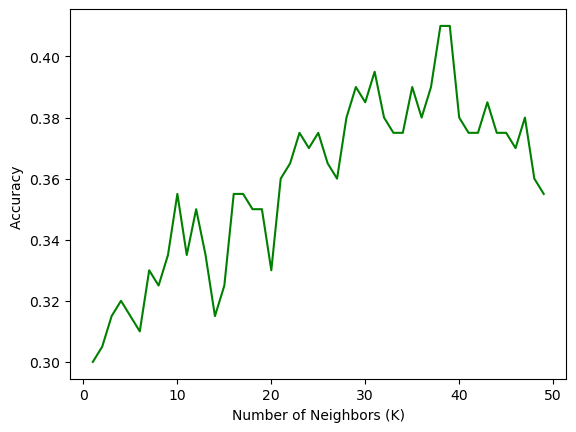

In [84]:
plt.plot(range(1,K_num),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')



In [85]:
print( "The best accuracy ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy  0.41 with k= 38
